# 1. Import Library & Data


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import random

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [9]:
train_df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test_df = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
train_df.shape, test_df.shape

((42000, 785), (28000, 784))

# 2. Overview of the Data

In [10]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [13]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


### Generate Random Number to Show Image

In [18]:
number = random.randint(0, 42000) 
number

30875

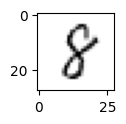

In [19]:
plt.figure(figsize=(1, 1))
plt.imshow(train_df.iloc[number, 1:].values.reshape(28, 28), cmap=plt.cm.binary)

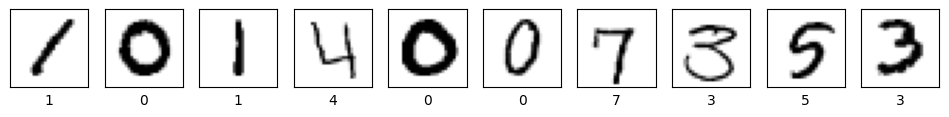

In [9]:
# code to show 10 images
plt.figure(figsize=(12, 12))
for i in range(10):
    plt.subplot(10, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_df.iloc[i, 1:].values.reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(train_df.iloc[i, 0])

###  Scaling and Label Separation

In [35]:
# converting number 0 to 256 to 0 to 1
x_train_df = train_df.iloc[:, 1:].values / 256
x_test_df = test_df.iloc[:, :].values / 256

In [21]:
y_train_df = train_df.iloc[:, 0].values
y_train_df[number]

8

In [22]:
x_train_df.shape, x_test_df.shape

((42000, 784), (28000, 784))

# 3. Train and Validation Split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x_train_df, y_train_df, test_size=0.2, random_state=42)

# 5. CNN

In [27]:
cnn_model = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3),
                  activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [29]:
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [30]:
history = cnn_model.fit(x_train.reshape(-1, 28, 28, 1), y_train, epochs=10,
              batch_size=32, validation_data=(x_test.reshape(-1, 28, 28, 1), y_test))

Epoch 1/10
1050/1050 [==============================] - 13s 4ms/step - loss: 0.2758 - accuracy: 0.9132 - val_loss: 0.0931 - val_accuracy: 0.9692
Epoch 2/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0686 - accuracy: 0.9793 - val_loss: 0.0579 - val_accuracy: 0.9831
Epoch 3/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0482 - accuracy: 0.9854 - val_loss: 0.0484 - val_accuracy: 0.9849
Epoch 4/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0372 - accuracy: 0.9880 - val_loss: 0.0472 - val_accuracy: 0.9856
Epoch 5/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0277 - accuracy: 0.9908 - val_loss: 0.0431 - val_accuracy: 0.9877
Epoch 6/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0241 - accuracy: 0.9924 - val_loss: 0.0434 - val_accuracy: 0.9871
Epoch 7/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0182 - accuracy: 0.9939 - val_loss: 0.0448 - val_accuracy

In [33]:
history_df = pd.DataFrame(history.history)
history_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.275792,0.913214,0.093085,0.969167
1,0.068559,0.979256,0.057937,0.983095
2,0.048153,0.985357,0.048405,0.984881
3,0.037206,0.987976,0.047194,0.985595
4,0.027696,0.990774,0.043074,0.987738


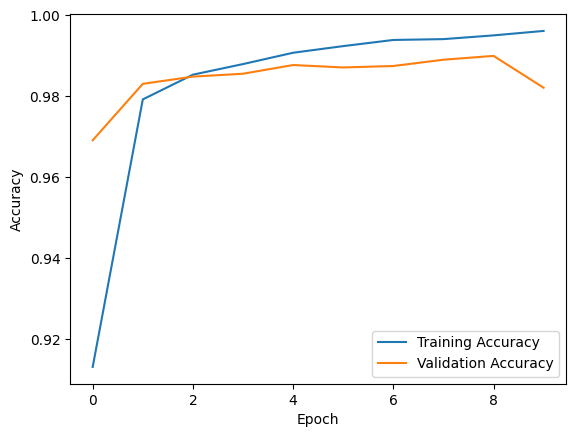

In [34]:
# Example: Plotting training history
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [35]:
test_loss, test_accuracy = cnn_model.evaluate(x_test.reshape(-1, 28, 28, 1), y_test)
print(f"Test Accuracy: {test_accuracy}")

263/263 [==============================] - 1s 3ms/step - loss: 0.0452 - accuracy: 0.9879
Test Accuracy: 0.9878571629524231


In [36]:
y_predicted = cnn_model.predict(x_test.reshape(-1, 28, 28, 1))

263/263 [==============================] - 1s 2ms/step


In [37]:
y_clsses = [np.argmax(i) for i in y_predicted]
y_clsses[:20]

[8, 1, 9, 9, 8, 6, 2, 2, 7, 1, 6, 3, 1, 2, 7, 4, 3, 3, 6, 4]

In [38]:
y_test[:20]

array([8, 1, 9, 9, 8, 6, 2, 2, 7, 1, 6, 3, 1, 2, 7, 4, 3, 3, 6, 4])

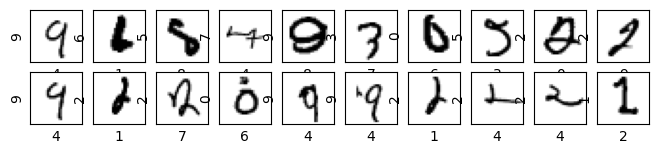

In [39]:
plt.figure(figsize=(8, 8))
count = 0  # Initialize a count variable

for i in range(x_test.shape[0]):
    if y_clsses[i] != y_test[i]:
        count += 1
        if count > 20:
            break  # Exit the loop if more than 100 subplots are created
        plt.subplot(10, 10, count)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)
        plt.xlabel(y_clsses[i])
        plt.ylabel(y_test[i])

plt.show()

In [40]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_clsses)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[810,   0,   0,   0,   2,   0,   2,   0,   0,   2],
       [  0, 905,   1,   1,   0,   0,   1,   1,   0,   0],
       [  2,   4, 831,   0,   3,   0,   0,   4,   1,   1],
       [  0,   0,   0, 929,   0,   1,   0,   4,   3,   0],
       [  1,   1,   0,   0, 830,   0,   1,   3,   0,   3],
       [  0,   0,   0,   5,   0, 693,   0,   0,   3,   1],
       [  0,   2,   0,   0,   1,   4, 776,   0,   2,   0],
       [  0,   0,   5,   0,   1,   0,   0, 887,   0,   0],
       [  0,   2,   2,   1,   2,   1,   0,   0, 826,   1],
       [  0,   1,   0,   1,  18,   1,   0,   3,   3, 811]], dtype=int32)>

Text(58.222222222222214, 0.5, 'Truth')

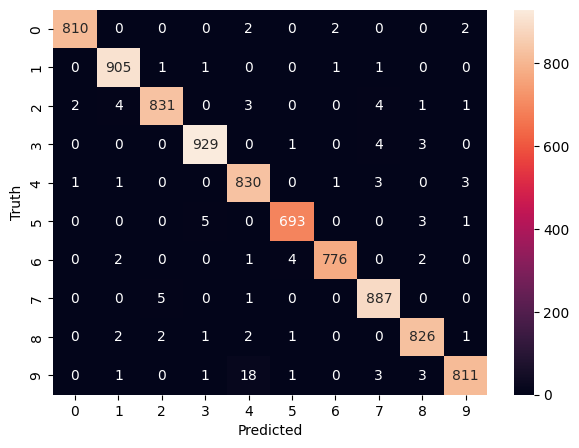

In [41]:
import seaborn as sn
plt.figure(figsize = (7,5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [42]:
y_predicted_x_test_df = cnn_model.predict(x_test_df.reshape(-1, 28, 28, 1))
y_predicted_x_test_df

875/875 [==============================] - 2s 2ms/step


array([[1.1401708e-07, 1.1166642e-11, 9.9999988e-01, ..., 3.4837871e-10,
        4.1867305e-09, 6.0028757e-14],
       [9.9998200e-01, 1.1271973e-05, 1.6038757e-07, ..., 2.7722078e-09,
        1.7581159e-07, 5.6604281e-06],
       [4.8180537e-10, 6.3062181e-08, 9.6360531e-11, ..., 1.2311578e-08,
        2.2054203e-06, 9.9999702e-01],
       ...,
       [2.4163910e-14, 3.6996472e-18, 1.1358261e-17, ..., 6.0472260e-13,
        3.4280194e-16, 5.5250303e-13],
       [3.2326228e-09, 1.5914993e-07, 2.1461782e-13, ..., 6.4425649e-06,
        4.0788564e-09, 9.9993753e-01],
       [2.6575304e-09, 4.5498893e-14, 1.0000000e+00, ..., 2.2941401e-12,
        2.6952593e-09, 3.0441919e-15]], dtype=float32)

In [43]:
y_classes_x_test_df = [np.argmax(i) for i in y_predicted_x_test_df]
y_classes_x_test_df[:20]

[2, 0, 9, 9, 3, 7, 0, 3, 0, 3, 5, 7, 4, 0, 4, 3, 3, 1, 9, 0]